In [39]:
import math
import bagpy
import numpy as np
import pandas as pd
import seaborn as sns
from bagpy import bagreader
import matplotlib.pyplot as plt
import statistics

In [40]:
b = bagreader('ind_data_hardik.bag')
imu_data = b.message_by_topic('/imu')
df_imu = pd.read_csv(imu_data)

[INFO]  Data folder ind_data_hardik already exists. Not creating.


In [41]:
df_imu

,Time,Header.seq,Header.stamp.secs,Header.stamp.nsecs,Header.frame_id,IMU.header.seq,IMU.header.stamp.secs,IMU.header.stamp.nsecs,IMU.header.frame_id,IMU.orientation.x,...,IMU.linear_acceleration_covariance,MagField.header.seq,MagField.header.stamp.secs,MagField.header.stamp.nsecs,MagField.header.frame_id,MagField.magnetic_field.x,MagField.magnetic_field.y,MagField.magnetic_field.z,MagField.magnetic_field_covariance,raw_data
0,1.666391e+09,3709,1666391426,58004140,IMU1_Frame,0,0,0,NaN,-0.631839,...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,0.2768,-0.0240,0.2032,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN
1,1.666391e+09,3710,1666391426,83182096,IMU1_Frame,0,0,0,NaN,-0.631836,...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,0.2769,-0.0213,0.2022,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN
2,1.666391e+09,3711,1666391426,108082532,IMU1_Frame,0,0,0,NaN,-0.631841,...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,0.2759,-0.0266,0.2022,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN
3,1.666391e+09,3712,1666391426,133130311,IMU1_Frame,0,0,0,NaN,-0.631839,...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,0.2768,-0.0257,0.2061,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN
4,1.666391e+09,3713,1666391426,158233880,IMU1_Frame,0,0,0,NaN,-0.631839,...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,0.2751,-0.0248,0.2050,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11984,1.666392e+09,15693,1666391725,642638921,IMU1_Frame,0,0,0,NaN,-0.624541,...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,0.2760,-0.0222,0.1973,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN
11985,1.666392e+09,15694,1666391725,667644500,IMU1_Frame,0,0,0,NaN,-0.624539,...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,0.2744,-0.0195,0.1942,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN
11986,1.666392e+09,15695,1666391725,692674875,IMU1_Frame,0,0,0,NaN,-0.624540,...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,0.2743,-0.0239,0.1972,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN
11987,1.666392e+09,15696,1666391725,717689752,IMU1_Frame,0,0,0,NaN,-0.624535,...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0,0,0,NaN,0.2759,-0.0248,0.1953,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN


In [19]:
def quat_to_euler(x, y, z, w):
    t0 = +2.0 * (w * x + y * z)
    t1 = +1.0 - 2.0 * (x * x + y * y)
    roll = math.atan2(t0, t1)

    t2 = +2.0 * (w * y - z * x)
    t2 = +1.0 if t2 > +1.0 else t2
    t2 = -1.0 if t2 < -1.0 else t2
    pitch = math.asin(t2)

    t3 = +2.0 * (w * z + x * y)
    t4 = +1.0 - 2.0 * (y * y + z * z)
    yaw = math.atan2(t3, t4)

    return roll, pitch, yaw

In [20]:
xs = df_imu['IMU.orientation.x'].to_list()
ys = df_imu['IMU.orientation.x'].to_list()
zs = df_imu['IMU.orientation.z'].to_list()
ws = df_imu['IMU.orientation.w'].to_list()

rolls = []
pitches = []
yaws = []

for (x, y, w, z) in zip(xs, ys, zs, ws):
    roll, pitch, yaw = quat_to_euler(x, y, w, z)
    rolls.append(roll)
    pitches.append(pitch)
    yaws.append(yaw)

df_imu['roll'] = rolls
df_imu['pitch'] = pitches
df_imu['yaw'] = yaws

In [38]:
print(statistics.mean(df_imu['roll']))
print(statistics.stdev(df_imu['roll']))
print(statistics.mean(df_imu['pitch']))
print(statistics.stdev(df_imu['pitch']))
print(statistics.mean(df_imu['yaw']))
print(statistics.stdev(df_imu['yaw']))


-2.33894367781616
0.005801928971189676
-1.5707963267948966
0.0
1.3608930243763553
0.008898526800637983


In [42]:
print(statistics.mean(df_imu['IMU.linear_acceleration.x']))
print(statistics.stdev(df_imu['IMU.linear_acceleration.x']))
print(statistics.mean(df_imu['IMU.linear_acceleration.y']))
print(statistics.stdev(df_imu['IMU.linear_acceleration.y']))
print(statistics.mean(df_imu['IMU.linear_acceleration.z']))
print(statistics.stdev(df_imu['IMU.linear_acceleration.z']))

-0.18418416882141964
0.013186077970942733
77.86815522562348
0.008307919833399164
-9.330048044040371
0.01865538485093958


In [43]:
print(statistics.mean(df_imu['IMU.angular_velocity.x']))
print(statistics.stdev(df_imu['IMU.angular_velocity.x']))
print(statistics.mean(df_imu['IMU.angular_velocity.y']))
print(statistics.stdev(df_imu['IMU.angular_velocity.y']))
print(statistics.mean(df_imu['IMU.angular_velocity.z']))
print(statistics.stdev(df_imu['IMU.angular_velocity.z']))

6.121694886979731e-05
0.0007484973903782624
-0.00010587988989907416
0.0008171842523909833
-0.0002904017015597631
0.0007182679631009989


In [44]:
print(statistics.mean(df_imu['MagField.magnetic_field.x']))
print(statistics.stdev(df_imu['MagField.magnetic_field.x']))
print(statistics.mean(df_imu['MagField.magnetic_field.y']))
print(statistics.stdev(df_imu['MagField.magnetic_field.y']))
print(statistics.mean(df_imu['MagField.magnetic_field.z']))
print(statistics.stdev(df_imu['MagField.magnetic_field.z']))

0.27620812411377094
0.0013539148710639021
-0.020926182333805988
0.0035017705060624194
0.20304308949870714
0.005242705340728552


In [21]:
df_imu

,Time,Header.seq,Header.stamp.secs,Header.stamp.nsecs,Header.frame_id,IMU.header.seq,IMU.header.stamp.secs,IMU.header.stamp.nsecs,IMU.header.frame_id,IMU.orientation.x,...,MagField.header.stamp.nsecs,MagField.header.frame_id,MagField.magnetic_field.x,MagField.magnetic_field.y,MagField.magnetic_field.z,MagField.magnetic_field_covariance,raw_data,roll,pitch,yaw
0,1.666391e+09,3709,1666391426,58004140,IMU1_Frame,0,0,0,NaN,-0.631839,...,0,NaN,0.2768,-0.0240,0.2032,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN,-2.347294,-1.570796,1.376091
1,1.666391e+09,3710,1666391426,83182096,IMU1_Frame,0,0,0,NaN,-0.631836,...,0,NaN,0.2769,-0.0213,0.2022,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN,-2.347301,-1.570796,1.376089
2,1.666391e+09,3711,1666391426,108082532,IMU1_Frame,0,0,0,NaN,-0.631841,...,0,NaN,0.2759,-0.0266,0.2022,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN,-2.347291,-1.570796,1.376092
3,1.666391e+09,3712,1666391426,133130311,IMU1_Frame,0,0,0,NaN,-0.631839,...,0,NaN,0.2768,-0.0257,0.2061,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN,-2.347273,-1.570796,1.376075
4,1.666391e+09,3713,1666391426,158233880,IMU1_Frame,0,0,0,NaN,-0.631839,...,0,NaN,0.2751,-0.0248,0.2050,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN,-2.347273,-1.570796,1.376075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11984,1.666392e+09,15693,1666391725,642638921,IMU1_Frame,0,0,0,NaN,-0.624541,...,0,NaN,0.2760,-0.0222,0.1973,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN,-2.329356,-1.570796,1.348662
11985,1.666392e+09,15694,1666391725,667644500,IMU1_Frame,0,0,0,NaN,-0.624539,...,0,NaN,0.2744,-0.0195,0.1942,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN,-2.329364,-1.570796,1.348664
11986,1.666392e+09,15695,1666391725,692674875,IMU1_Frame,0,0,0,NaN,-0.624540,...,0,NaN,0.2743,-0.0239,0.1972,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN,-2.329378,-1.570796,1.348684
11987,1.666392e+09,15696,1666391725,717689752,IMU1_Frame,0,0,0,NaN,-0.624535,...,0,NaN,0.2759,-0.0248,0.1953,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",NaN,-2.329346,-1.570796,1.348640


In [22]:
df_imu['Time'] = df_imu['Time'] - min(df_imu['Time']) 

In [50]:
print(max(rolls) - min(rolls))

0.023866538446966956


In [23]:
df_imu.to_csv('grp_data.csv')

In [24]:
def plot_graph(xax, yax, units_x, units_y, scatter=False):
    if scatter:
        plt.scatter(df_imu[xax].tolist(), df_imu[yax].tolist())
    else:
        plt.plot(df_imu[xax].tolist(), df_imu[yax].tolist())
    plt.xlabel(f'{xax}({units_x})')
    plt.ylabel(f'{yax}({units_y})')
    plt.title(f'{yax} vs {xax}')
    plt.show()

In [25]:
def plot_histogram(col, units):
    sns.set_style('white')
    sns.set_context("paper", font_scale = 2)
    sns.displot(data=df_imu, x=col, kind="hist", bins=100, aspect=1.5).set(title=f'error distribution of {col} (units: {units})')

In [30]:
cols = ['roll', 'yaw', 'pitch', 'IMU.angular_velocity.x', 'IMU.angular_velocity.y', 'IMU.angular_velocity.z',
       'IMU.linear_acceleration.x', 'IMU.linear_acceleration.y', 'IMU.linear_acceleration.z',
       'MagField.magnetic_field.x', 'MagField.magnetic_field.y', 'MagField.magnetic_field.z']
col_units = ['rads'] * 3 + ['rads/s'] * 3 + ['m/s2'] * 3 + ['wb/m2'] * 3
flags = [False] * 3 + [True]  * 9

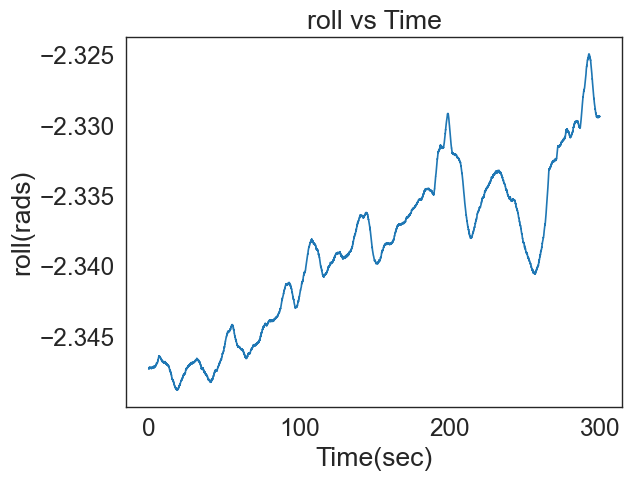

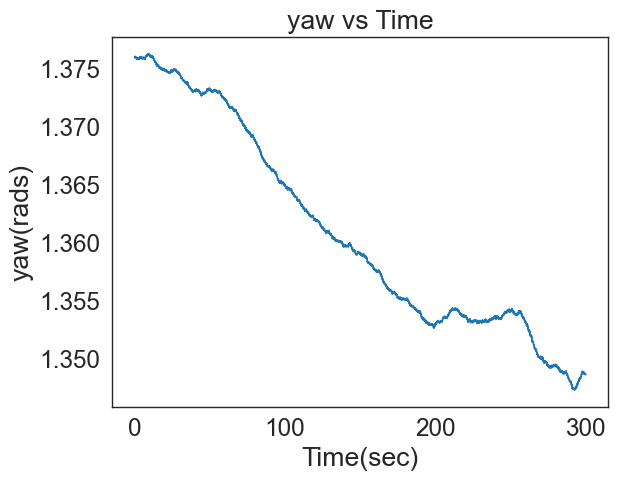

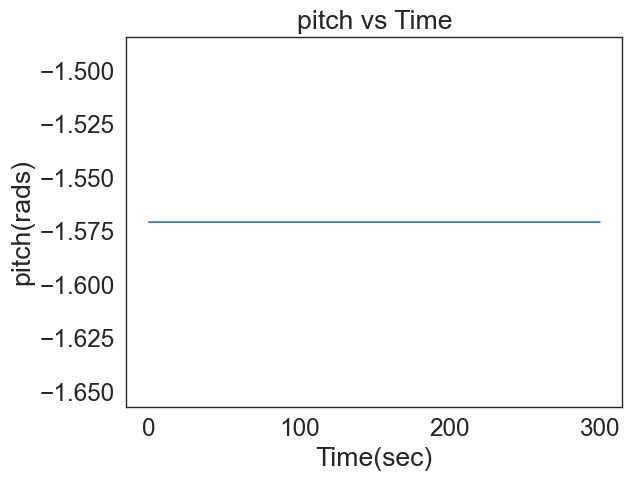

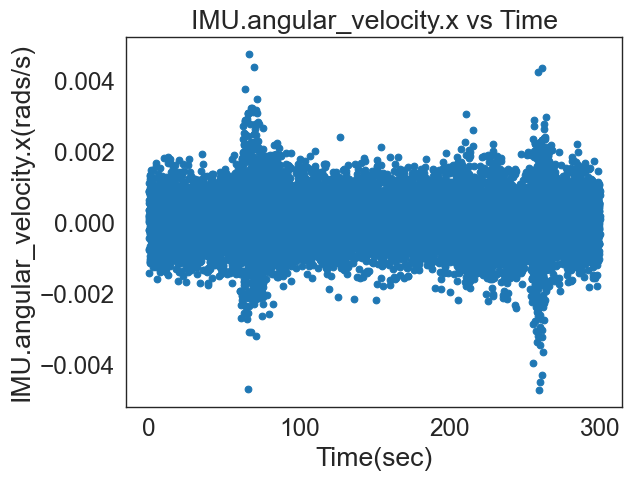

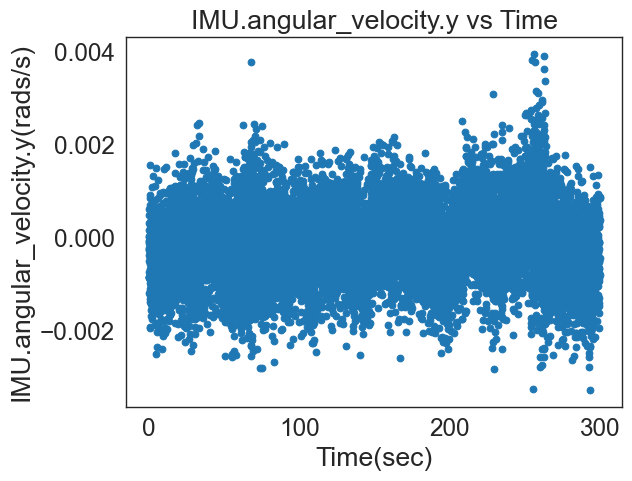

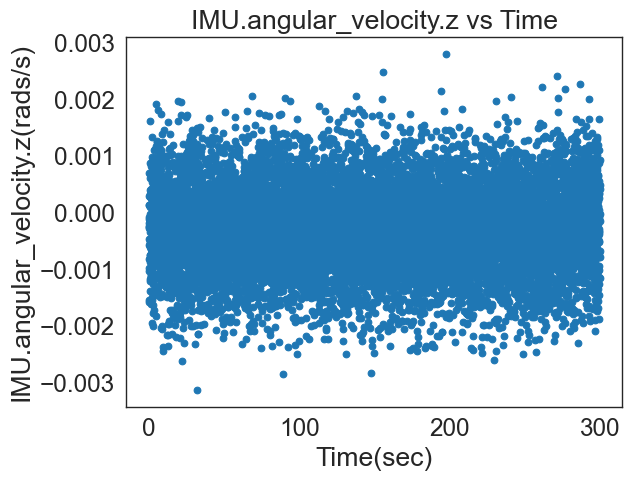

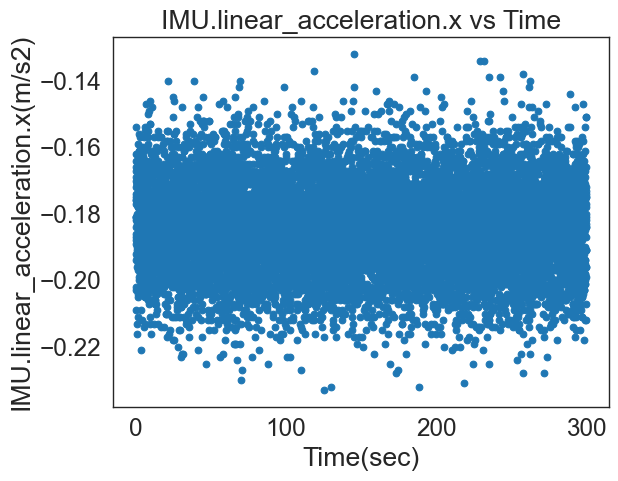

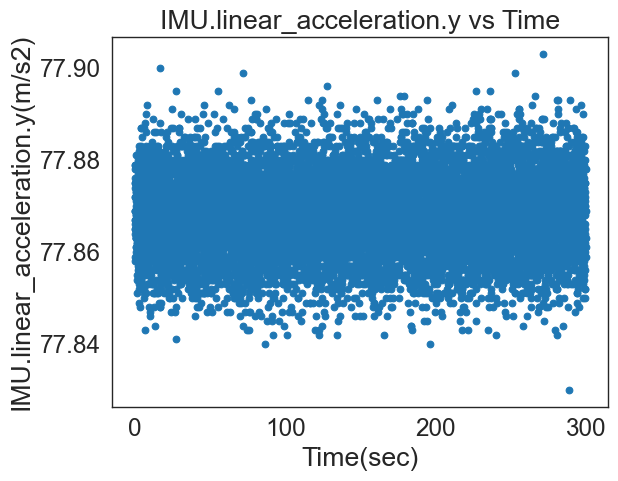

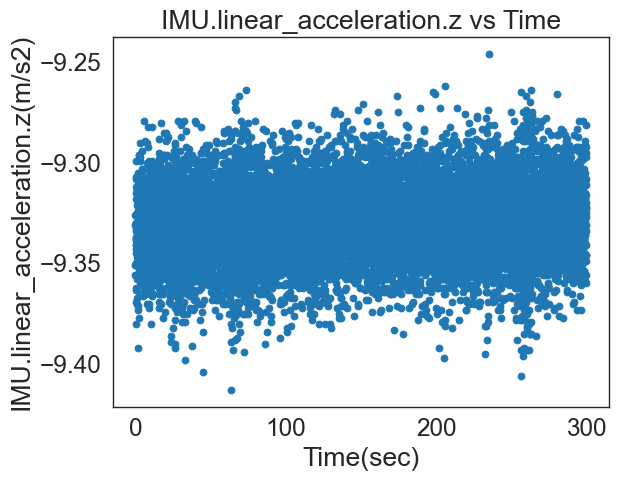

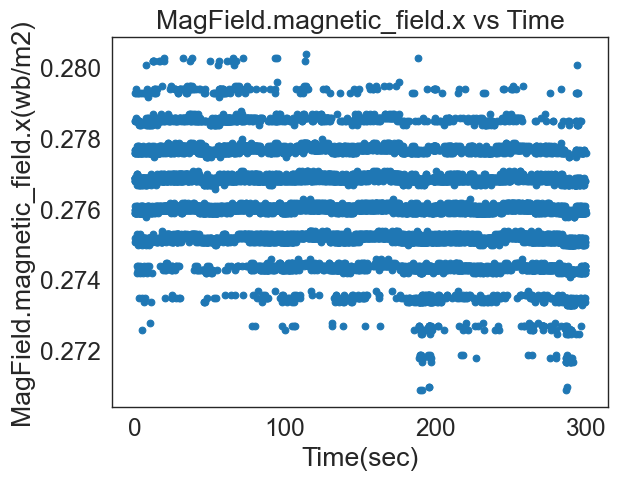

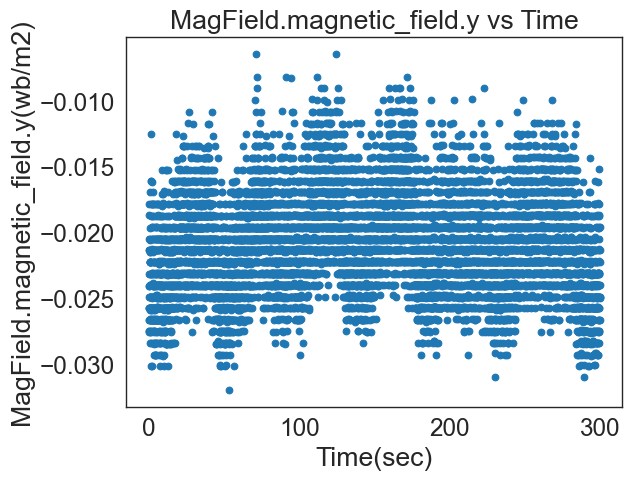

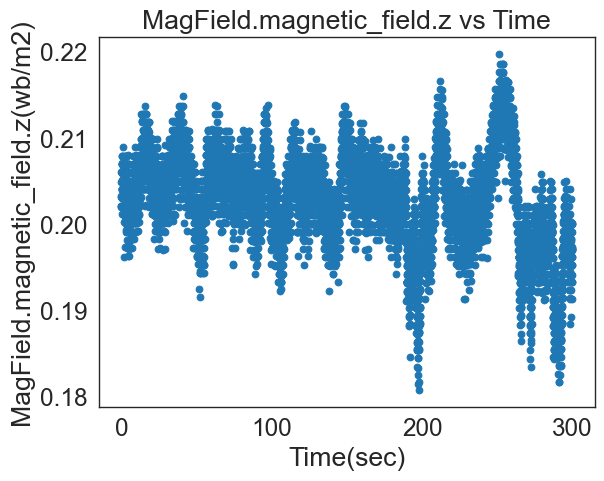

In [31]:
for col, unit, flag in zip(cols, col_units, flags):
    plot_graph('Time', col, 'sec', unit, flag)

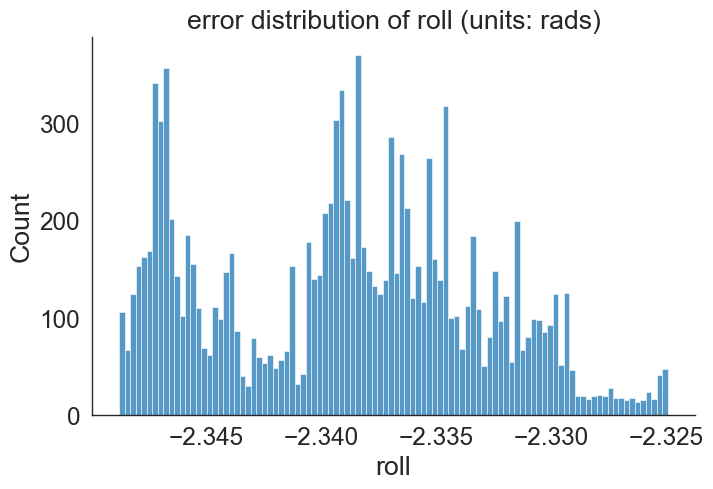

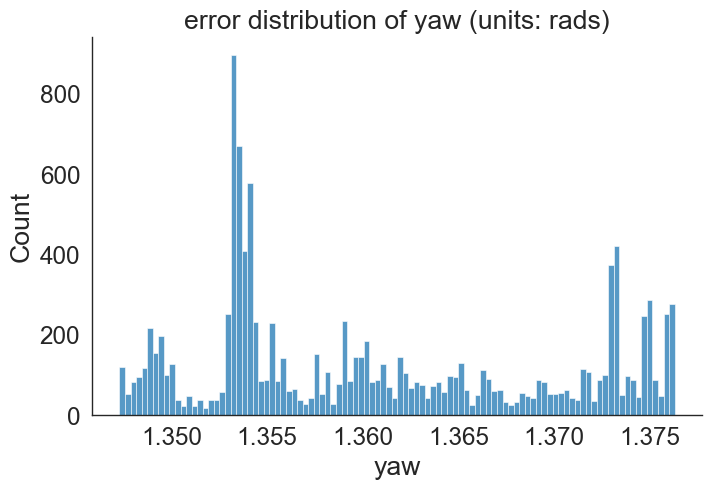

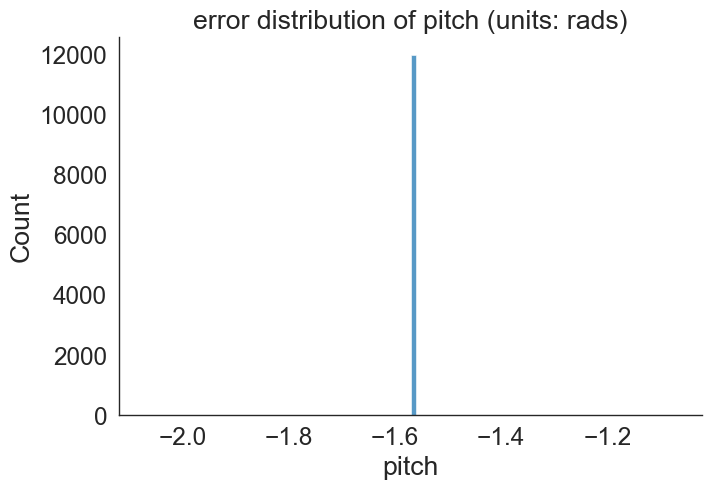

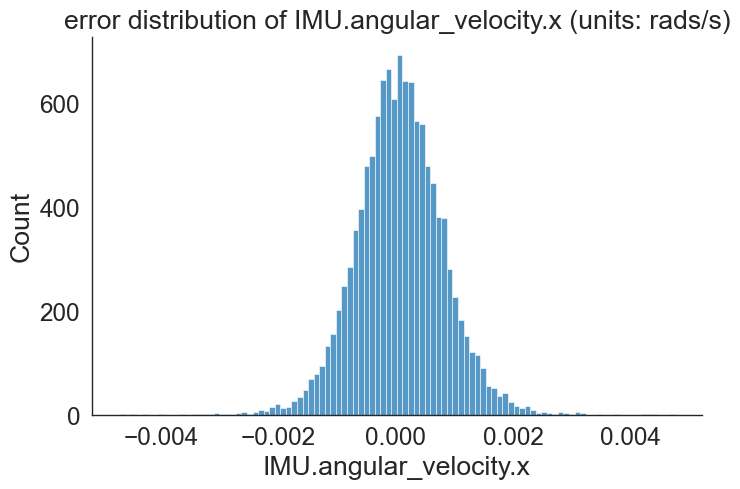

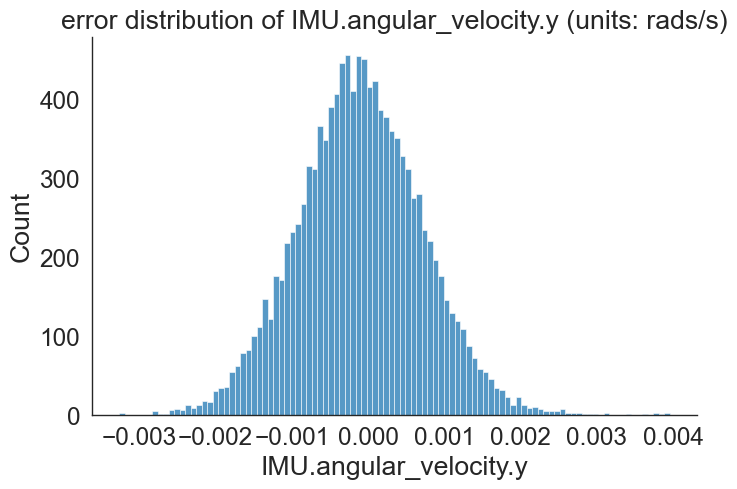

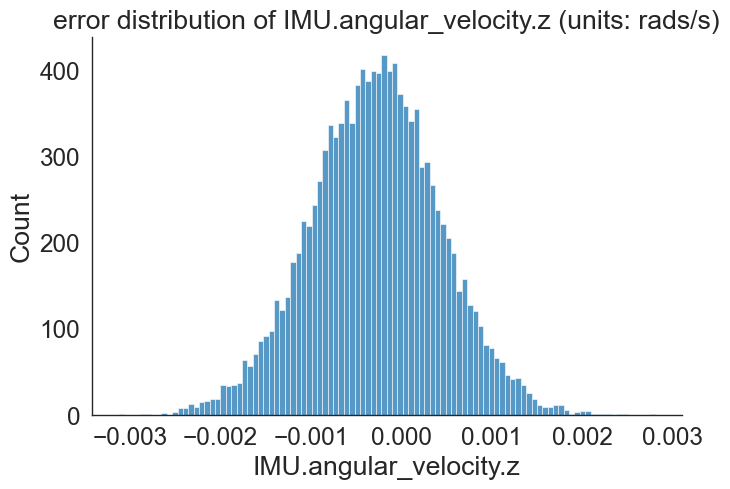

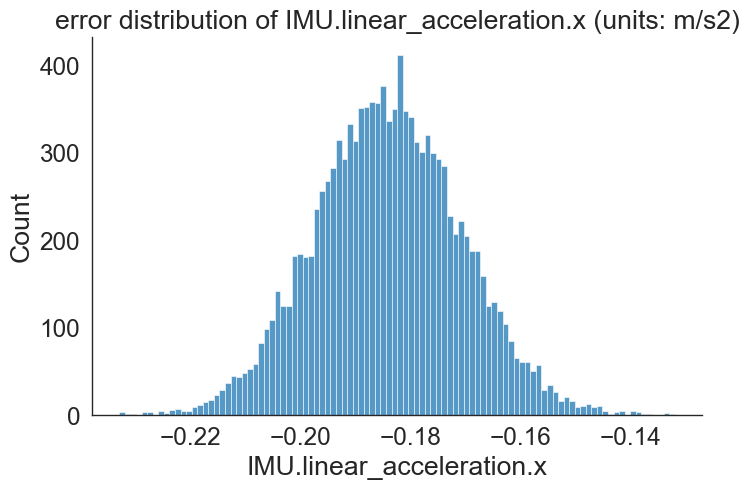

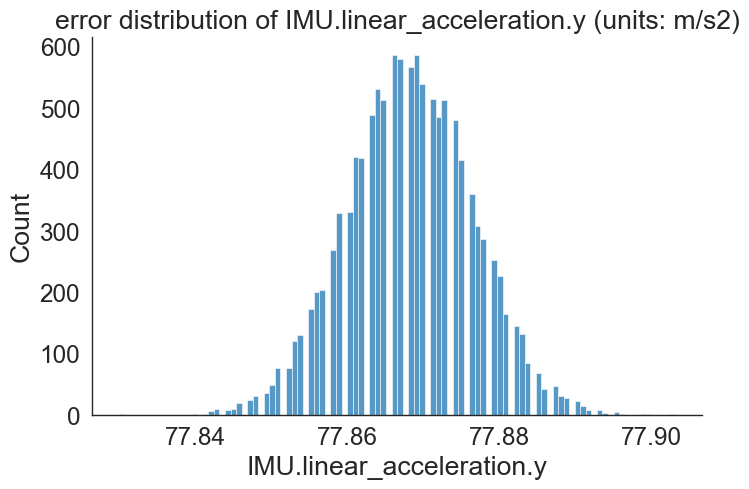

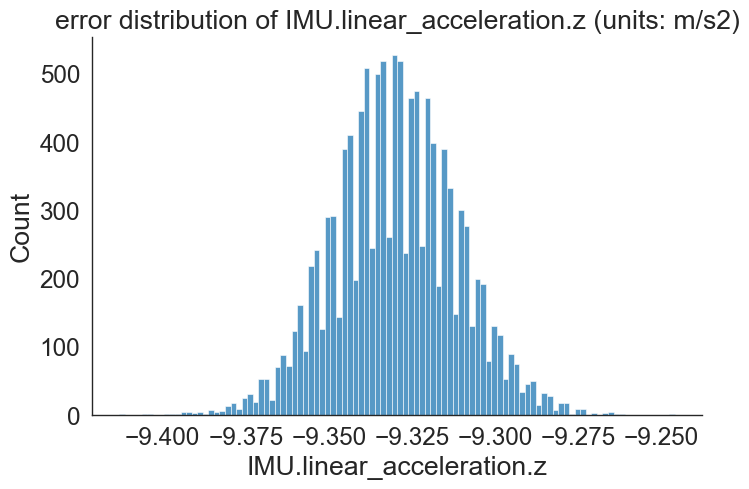

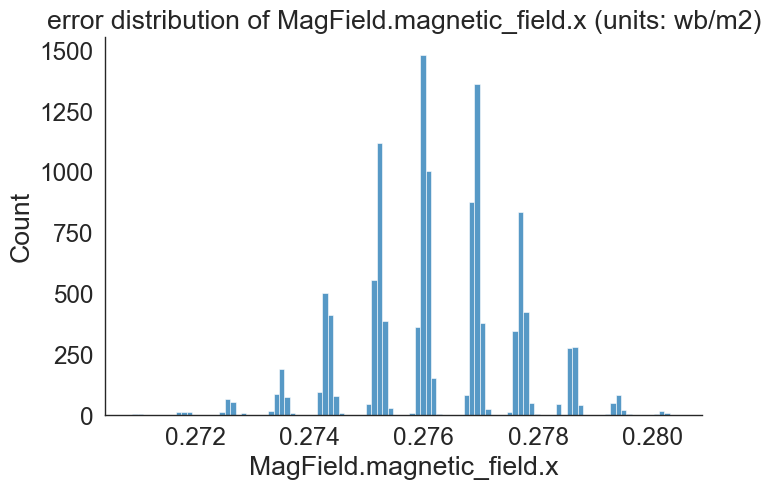

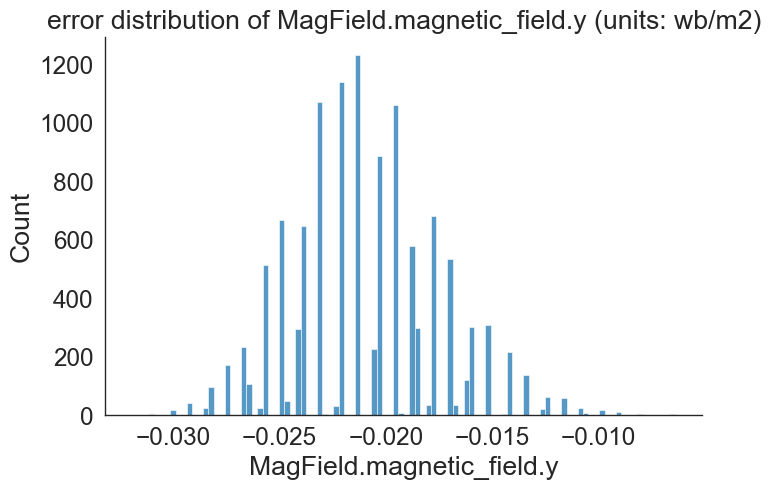

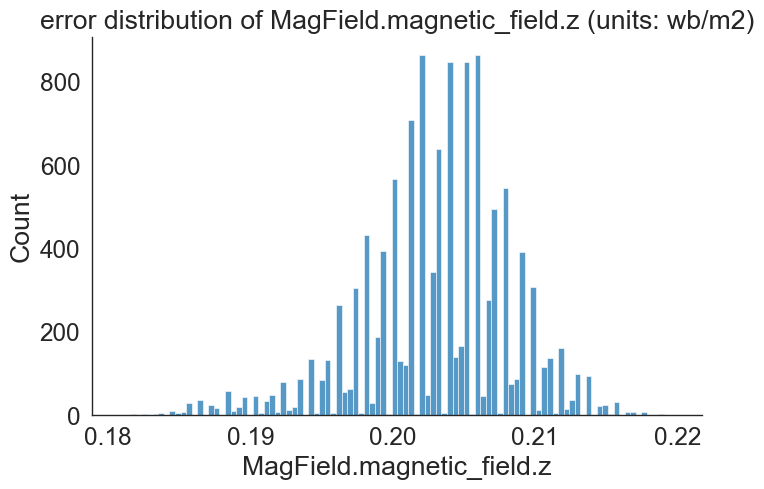

In [14]:
for col, unit in zip(cols, col_units):
    plot_histogram(col, unit)